<a href="https://colab.research.google.com/github/rahulnath2904/Google-Stock-Price-Prediction/blob/master/google_stock_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Description : This program predicts the price of Google Stock for a specific day 

In [ ]:
# By : Rahul Nath

In [ ]:
# Import the libraries
from sklearn.svm import SVR
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')

In [ ]:
# Load the data
from google.colab import files
uploaded = files.upload()

Saving google_stock2.csv to google_stock2.csv


In [ ]:
# Store and look at the data
df = pd.read_csv('google_stock2.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,22-08-2019,1194.069946,1198.011963,1178.579956,1189.530029,1189.530029,947500
1,23-08-2019,1181.989990,1194.079956,1147.750000,1151.290039,1151.290039,1687000
2,26-08-2019,1157.260010,1169.469971,1152.959961,1168.890015,1168.890015,1226100
3,27-08-2019,1180.530029,1182.400024,1161.449951,1167.839966,1167.839966,1077200
4,28-08-2019,1161.709961,1176.420044,1157.300049,1171.020020,1171.020020,802000
5,29-08-2019,1181.119995,1196.060059,1181.119995,1192.849976,1192.849976,1088400
6,30-08-2019,1198.500000,1198.500000,1183.802979,1188.099976,1188.099976,1129800
7,03-09-2019,1177.030029,1186.890015,1163.199951,1168.390015,1168.390015,1479900
8,04-09-2019,1176.709961,1183.479980,1171.000000,1181.410034,1181.410034,1068900
9,05-09-2019,1191.530029,1213.040039,1191.530029,1211.380005,1211.380005,1408100


In [ ]:
# Get and print the last row of data
actual_price = df.tail(1)
actual_price

,Date,Open,High,Low,Close,Adj Close,Volume
30,04-10-2019,1191.890015,1211.439941,1189.170044,1209.0,1209.0,1021092


In [ ]:
# Prepare the data for training
df = df.head(len(df)-1)
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,22-08-2019,1194.069946,1198.011963,1178.579956,1189.530029,1189.530029,947500
1,23-08-2019,1181.989990,1194.079956,1147.750000,1151.290039,1151.290039,1687000
2,26-08-2019,1157.260010,1169.469971,1152.959961,1168.890015,1168.890015,1226100
3,27-08-2019,1180.530029,1182.400024,1161.449951,1167.839966,1167.839966,1077200
4,28-08-2019,1161.709961,1176.420044,1157.300049,1171.020020,1171.020020,802000
5,29-08-2019,1181.119995,1196.060059,1181.119995,1192.849976,1192.849976,1088400
6,30-08-2019,1198.500000,1198.500000,1183.802979,1188.099976,1188.099976,1129800
7,03-09-2019,1177.030029,1186.890015,1163.199951,1168.390015,1168.390015,1479900
8,04-09-2019,1176.709961,1183.479980,1171.000000,1181.410034,1181.410034,1068900
9,05-09-2019,1191.530029,1213.040039,1191.530029,1211.380005,1211.380005,1408100


In [ ]:
# Create an empty list to store the independent and dependent data
days = list()
adj_close_prices = list()

In [ ]:
# Get the date and the adjusted close price
df_days = df.loc[:, 'Date']
df_adj_close = df.loc[:, 'Adj Close']

In [ ]:
# Create the independent data set
for day in df_days:
  days.append( [int (day.split('-')[1])] )

# Create the dependent data set
for adj_close_price in df_adj_close:
  adj_close_prices.append( float (adj_close_price) )

In [ ]:
# Create the 3 Support Vector Regression (SVR) Models

# Create and train a SVR model using a linear kernel
lin_svr = SVR(kernel = 'linear', C = 1000.0)
lin_svr.fit(days, adj_close_prices)

# Create and train a SVR model using a polynomial kernel
poly_svr = SVR(kernel = 'poly', C = 1000.0, degree = 2)
poly_svr.fit(days, adj_close_prices)

# Create and train a SVR model using a rbf kernel
rbf_svr = SVR(kernel = 'rbf', C = 1000.0, gamma = 0.15)
rbf_svr.fit(days, adj_close_prices)


SVR(C=1000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.15,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

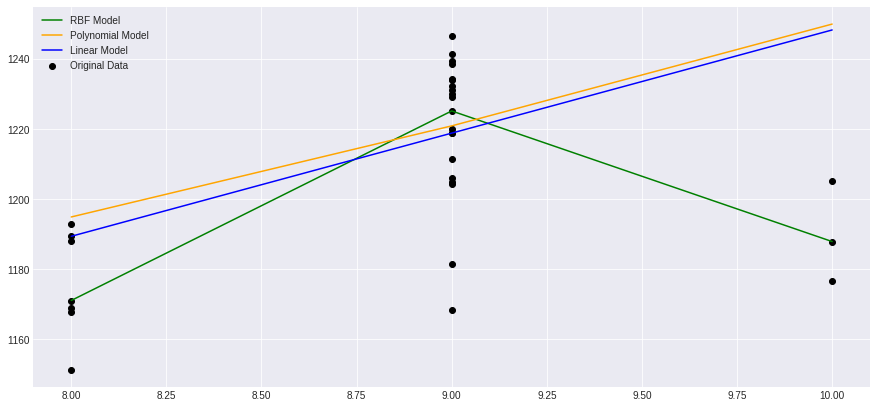

In [ ]:
# Plot the models on a graph to see which has the best for the original data
# black : Original data 
# green : RBF Model
# orange : Polynomial Model
# blue : Linear Model
plt.figure(figsize = (15,7))
plt.scatter(days, adj_close_prices, color = 'black', label = 'Original Data')
plt.plot(days, rbf_svr.predict(days), color = 'green', label = 'RBF Model')
plt.plot(days, poly_svr.predict(days), color = 'orange', label = 'Polynomial Model')
plt.plot(days, lin_svr.predict(days), color = 'blue', label = 'Linear Model')
plt.legend()
plt.show()


In [ ]:
# Show the predicted price for the given day
day = [[30]]

print('The RBF SVR Predicted: ',rbf_svr.predict(day))
print('The Linear SVR Predicted: ',lin_svr.predict(day))
print('The Polynomial SVR Predicted: ',poly_svr.predict(day))

The RBF SVR Predicted:  [1105.15365495]
The Linear SVR Predicted:  [1836.889611]
The Polynomial SVR Predicted:  [2472.71009608]


In [ ]:
# Print the actual price
print('The Actual price: ', actual_price['Adj Close'][30])

The Actual price:  1209.0
